<a href="https://colab.research.google.com/github/ciepielajan/SDA_SMOG_Wawelski/blob/main/Jan/SDA_2021_04_17_Projekt_koncowy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 Załadowanie plików







In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [3]:
!gdown --id "186S03hFJ67K4eV1BWb2_6lZxAYG7dBM4"

Downloading...
From: https://drive.google.com/uc?id=186S03hFJ67K4eV1BWb2_6lZxAYG7dBM4
To: /content/archive.zip
2.39MB [00:00, 75.4MB/s]


In [4]:
!unzip -q "archive.zip" -d data/

In [5]:
all_file_names = glob.glob("data/*2017.csv")
all_file_names = sorted(all_file_names)
for counter, file in enumerate(all_file_names):
    print(counter, file)

0 data/april-2017.csv
1 data/august-2017.csv
2 data/december-2017.csv
3 data/february-2017.csv
4 data/january-2017.csv
5 data/july-2017.csv
6 data/june-2017.csv
7 data/march-2017.csv
8 data/may-2017.csv
9 data/november-2017.csv
10 data/october-2017.csv
11 data/september-2017.csv


In [6]:
jan = pd.read_csv(all_file_names[4])
feb = pd.read_csv(all_file_names[3])
mar = pd.read_csv(all_file_names[7])
apr = pd.read_csv(all_file_names[0])
may = pd.read_csv(all_file_names[8])
jun = pd.read_csv(all_file_names[6])
jul = pd.read_csv(all_file_names[5])
aug = pd.read_csv(all_file_names[1])
sep = pd.read_csv(all_file_names[11])
octo = pd.read_csv(all_file_names[10])
nov = pd.read_csv(all_file_names[9])
dec = pd.read_csv(all_file_names[2])

In [7]:
dec.head(1)

UTC time  3_temperature  3_humidity  ...  895_pm1  895_pm25  895_pm10
0  2017-12-01T00:00:00            NaN         NaN  ...       34        36        66

[1 rows x 337 columns]

In [8]:
sensors = pd.read_csv("data/sensor_locations.csv")

In [9]:
sensors[:3]

id   latitude  longitude
0    3  50.057748  19.961375
1  140  50.057747  19.961374
2  142  50.084816  19.878066

2 Połączenie wszystkich df


In [10]:
year = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec])

In [11]:
year.shape

(8593, 337)

In [12]:
year.head(2)

UTC time  3_temperature  3_humidity  ...  895_pm1  895_pm25  895_pm10
0  2017-01-01T00:00:00            NaN         NaN  ...      NaN       NaN       NaN
1  2017-01-01T01:00:00            NaN         NaN  ...      NaN       NaN       NaN

[2 rows x 337 columns]

3 Transformacja df







In [13]:
year["UTC time"] = pd.to_datetime(year["UTC time"], format="%Y-%m-%dT%H:%M:%S")
year[:3]

UTC time  3_temperature  3_humidity  ...  895_pm1  895_pm25  895_pm10
0 2017-01-01 00:00:00            NaN         NaN  ...      NaN       NaN       NaN
1 2017-01-01 01:00:00            NaN         NaN  ...      NaN       NaN       NaN
2 2017-01-01 02:00:00            NaN         NaN  ...      NaN       NaN       NaN

[3 rows x 337 columns]

In [14]:
year = year.set_index("UTC time")
year[:3]

3_temperature  3_humidity  ...  895_pm25  895_pm10
UTC time                                        ...                    
2017-01-01 00:00:00            NaN         NaN  ...       NaN       NaN
2017-01-01 01:00:00            NaN         NaN  ...       NaN       NaN
2017-01-01 02:00:00            NaN         NaN  ...       NaN       NaN

[3 rows x 336 columns]

In [15]:
year.index[:3]

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00'],
              dtype='datetime64[ns]', name='UTC time', freq=None)

In [16]:
year.describe()

3_temperature  3_humidity  ...     895_pm25     895_pm10
count     206.000000  206.000000  ...  6337.000000  6337.000000
mean       -5.131068   74.718447  ...    23.922519    41.092788
std         2.174645    9.939247  ...    20.897541    32.908029
min        -9.000000   38.000000  ...     0.000000     0.000000
25%        -7.000000   69.000000  ...    11.000000    18.000000
50%        -6.000000   77.000000  ...    19.000000    33.000000
75%        -4.000000   82.000000  ...    30.000000    54.000000
max         2.000000   92.000000  ...   159.000000   239.000000

[8 rows x 336 columns]

In [17]:
year.isnull().sum().to_frame().T

3_temperature  3_humidity  3_pressure  ...  895_pm1  895_pm25  895_pm10
0           8387        8387        7415  ...     2256      2256      2256

[1 rows x 336 columns]

In [18]:
columns_pm10 = [ i  for i in year.columns if  i.split("_")[1] == "pm10"]
print(columns_pm10)

['3_pm10', '140_pm10', '142_pm10', '147_pm10', '169_pm10', '170_pm10', '171_pm10', '172_pm10', '173_pm10', '174_pm10', '176_pm10', '177_pm10', '178_pm10', '179_pm10', '180_pm10', '181_pm10', '182_pm10', '183_pm10', '184_pm10', '185_pm10', '187_pm10', '189_pm10', '192_pm10', '194_pm10', '195_pm10', '196_pm10', '201_pm10', '202_pm10', '203_pm10', '204_pm10', '205_pm10', '208_pm10', '209_pm10', '210_pm10', '211_pm10', '212_pm10', '213_pm10', '214_pm10', '215_pm10', '216_pm10', '218_pm10', '219_pm10', '220_pm10', '221_pm10', '222_pm10', '223_pm10', '225_pm10', '226_pm10', '227_pm10', '228_pm10', '263_pm10', '622_pm10', '713_pm10', '808_pm10', '857_pm10', '895_pm10']


In [19]:
from matplotlib import pyplot as plt

In [20]:
d1 = pd.date_range("2017-01-01", "2017-03-31", freq="W-MON")
d1

DatetimeIndex(['2017-01-02', '2017-01-09', '2017-01-16', '2017-01-23',
               '2017-01-30', '2017-02-06', '2017-02-13', '2017-02-20',
               '2017-02-27', '2017-03-06', '2017-03-13', '2017-03-20',
               '2017-03-27'],
              dtype='datetime64[ns]', freq='W-MON')

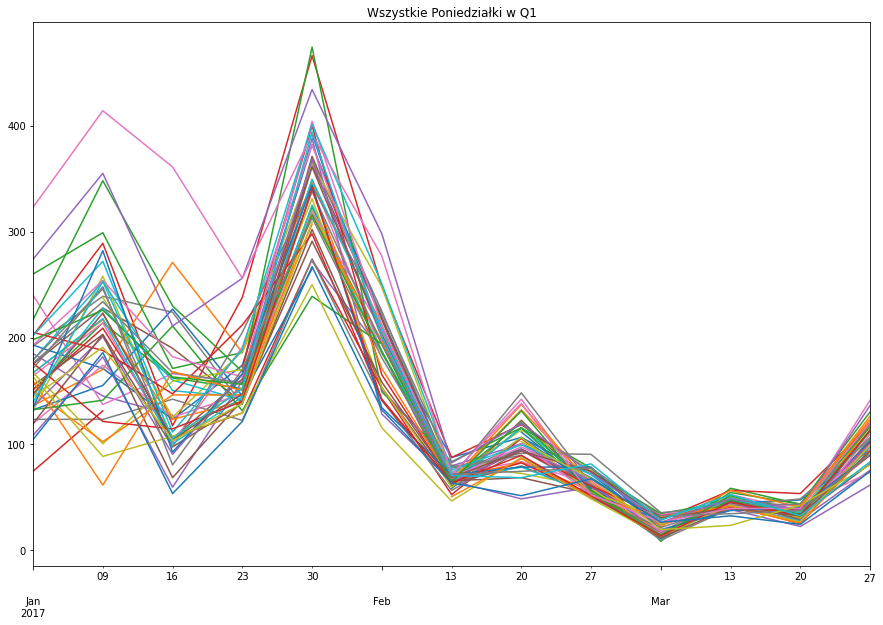

In [21]:
year[columns_pm10].loc[d1].plot(figsize=(15,10), legend=False, subplots=False)
plt.title("Wszystkie Poniedziałki w Q1")
plt.show()

In [22]:
d1 = pd.date_range("2017-04-01", "2017-06-30", freq="W-MON")
d1

DatetimeIndex(['2017-04-03', '2017-04-10', '2017-04-17', '2017-04-24',
               '2017-05-01', '2017-05-08', '2017-05-15', '2017-05-22',
               '2017-05-29', '2017-06-05', '2017-06-12', '2017-06-19',
               '2017-06-26'],
              dtype='datetime64[ns]', freq='W-MON')

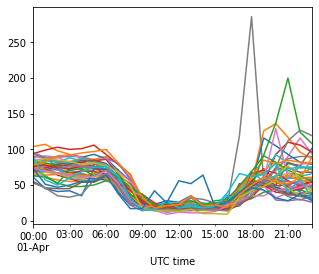

In [23]:
year[columns_pm10].loc['2017-04-01'].plot(figsize=(5,4), legend=False, subplots=False)

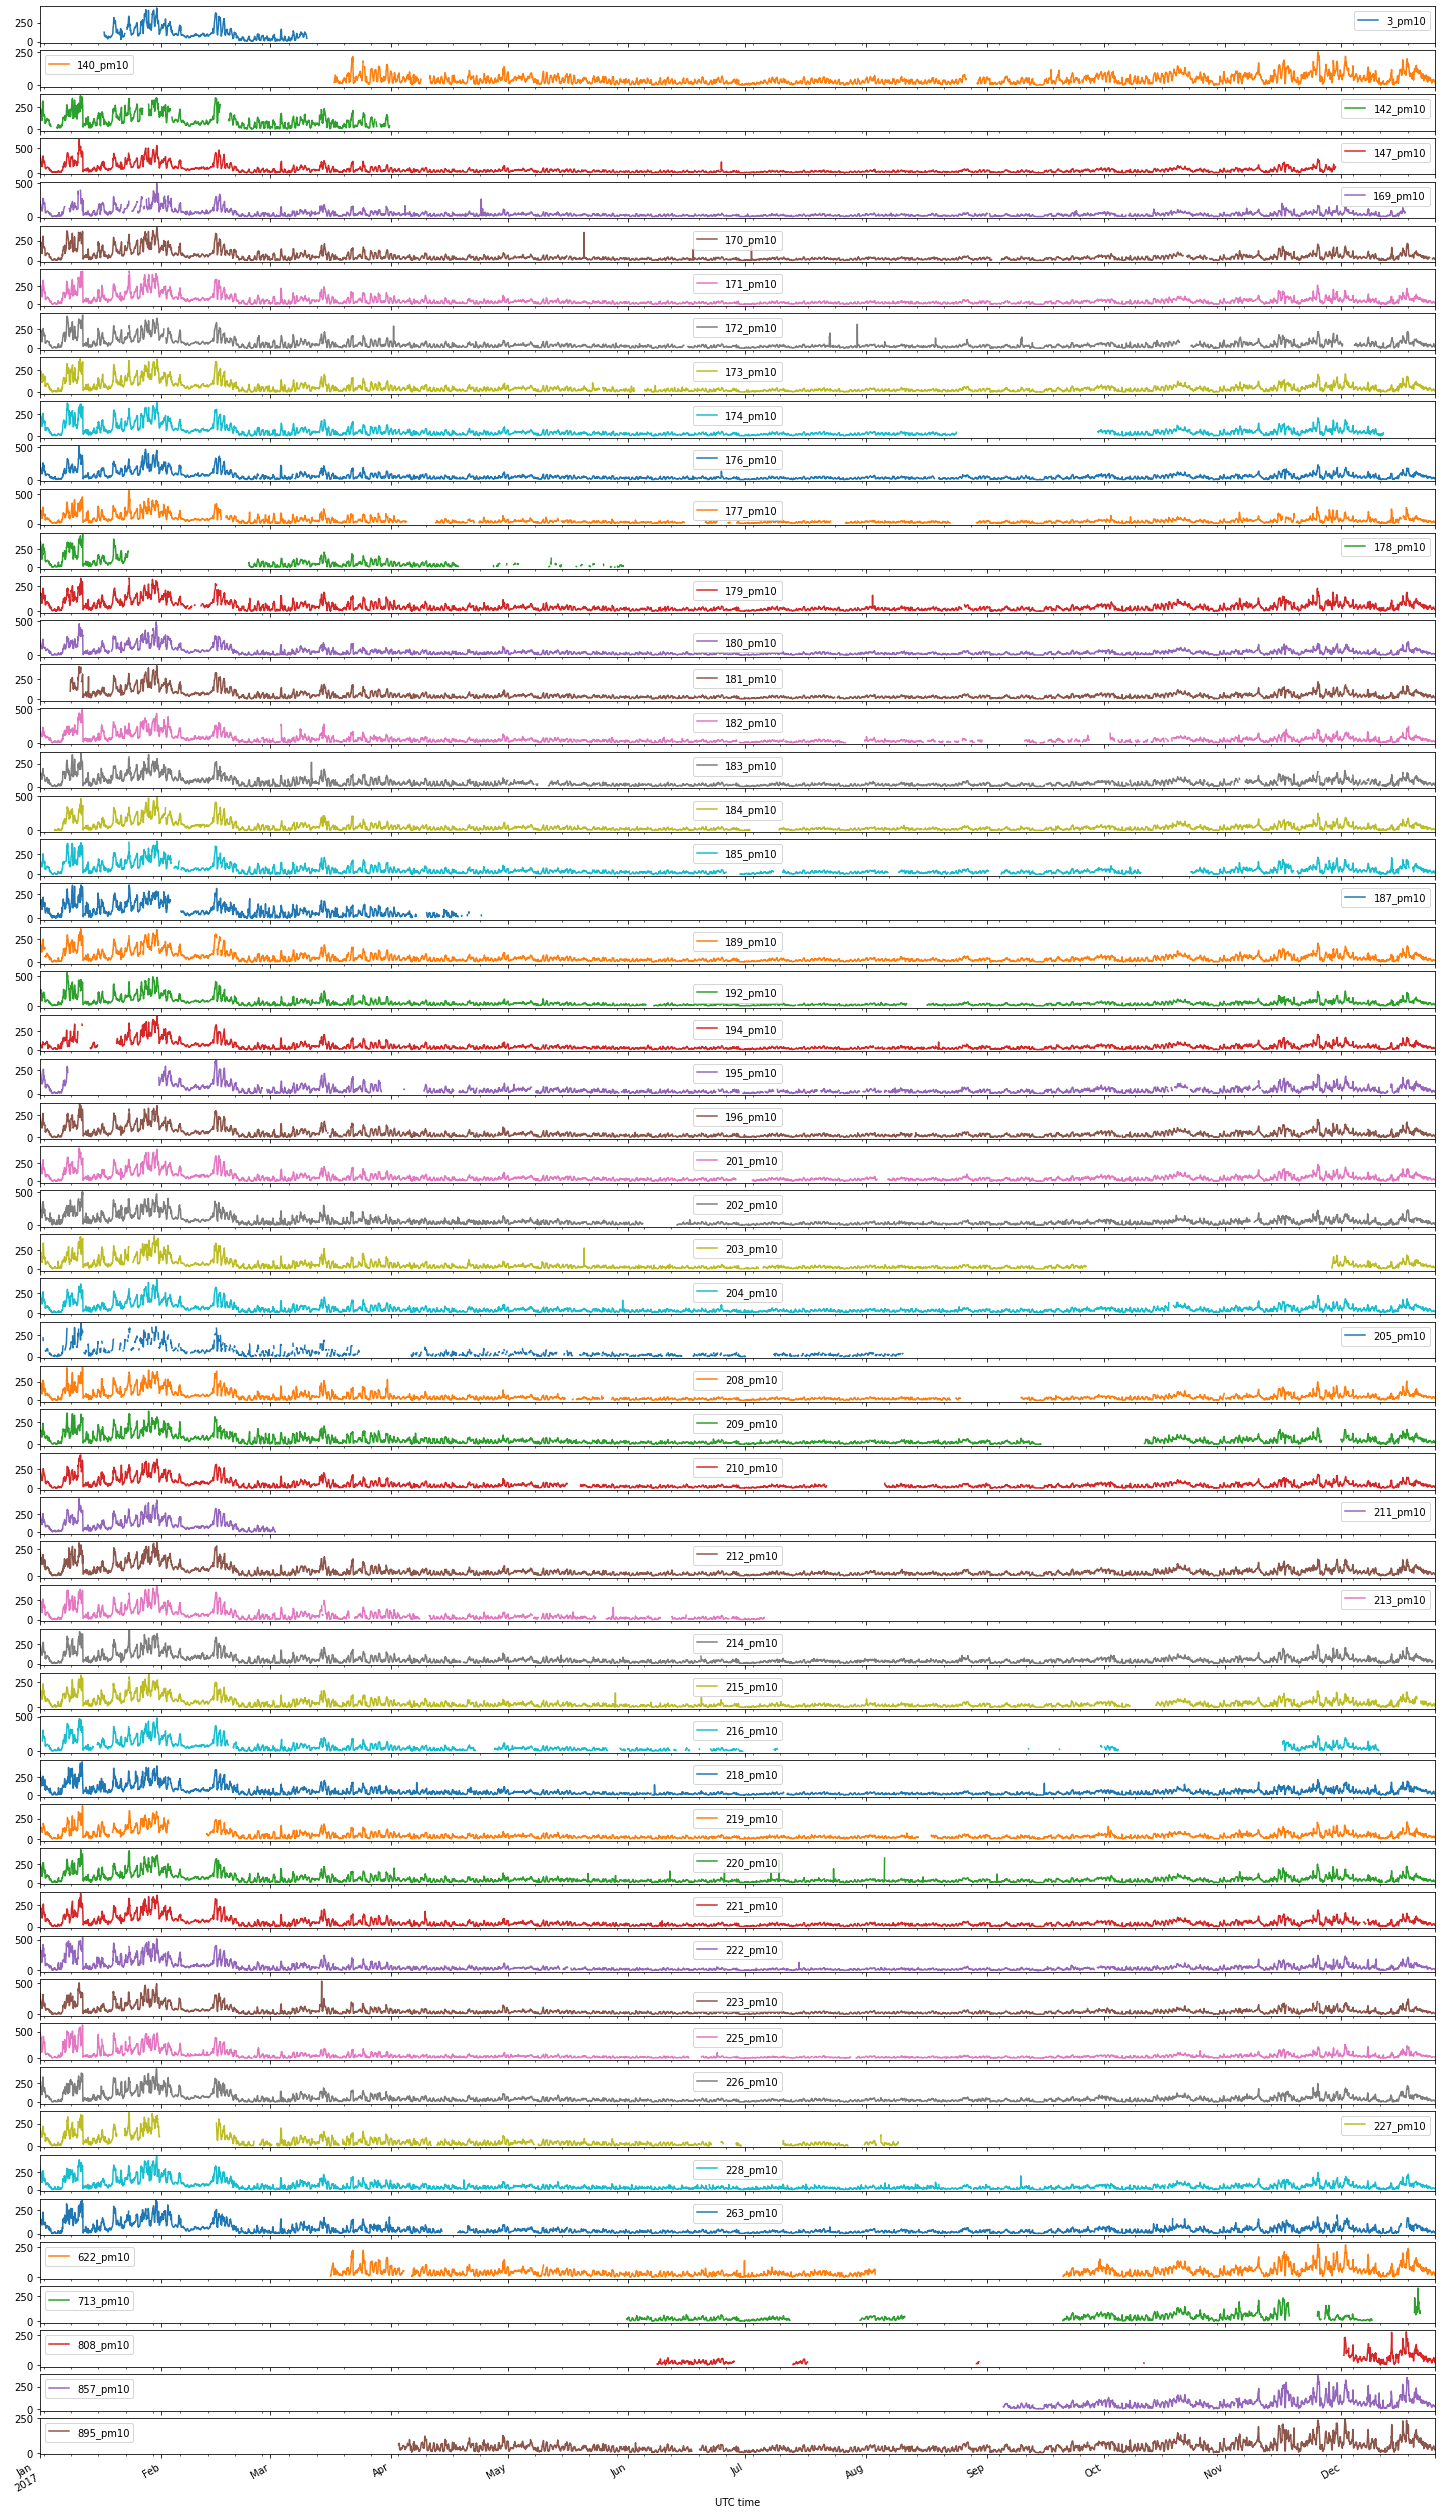

<Figure size 432x288 with 0 Axes>

In [24]:
year[columns_pm10].plot(figsize=(25,50), legend=True, subplots=True)
plt.show()
plt.savefig('time-series-pm10.png')

In [25]:
import pandas as pd

In [26]:
year_hour = [x for x in pd.date_range(start='2017-01-01', end="2017-12-31", freq="1H")  ]
len(year_hour)

8737

In [27]:
days = year[columns_pm10].groupby(pd.Grouper(freq='1D', origin='start')).mean()
days[:3]

3_pm10  140_pm10  142_pm10  ...  808_pm10  857_pm10  895_pm10
UTC time                                ...                              
2017-01-01     NaN       NaN    193.00  ...       NaN       NaN       NaN
2017-01-02     NaN       NaN    109.75  ...       NaN       NaN       NaN
2017-01-03     NaN       NaN     70.70  ...       NaN       NaN       NaN

[3 rows x 56 columns]

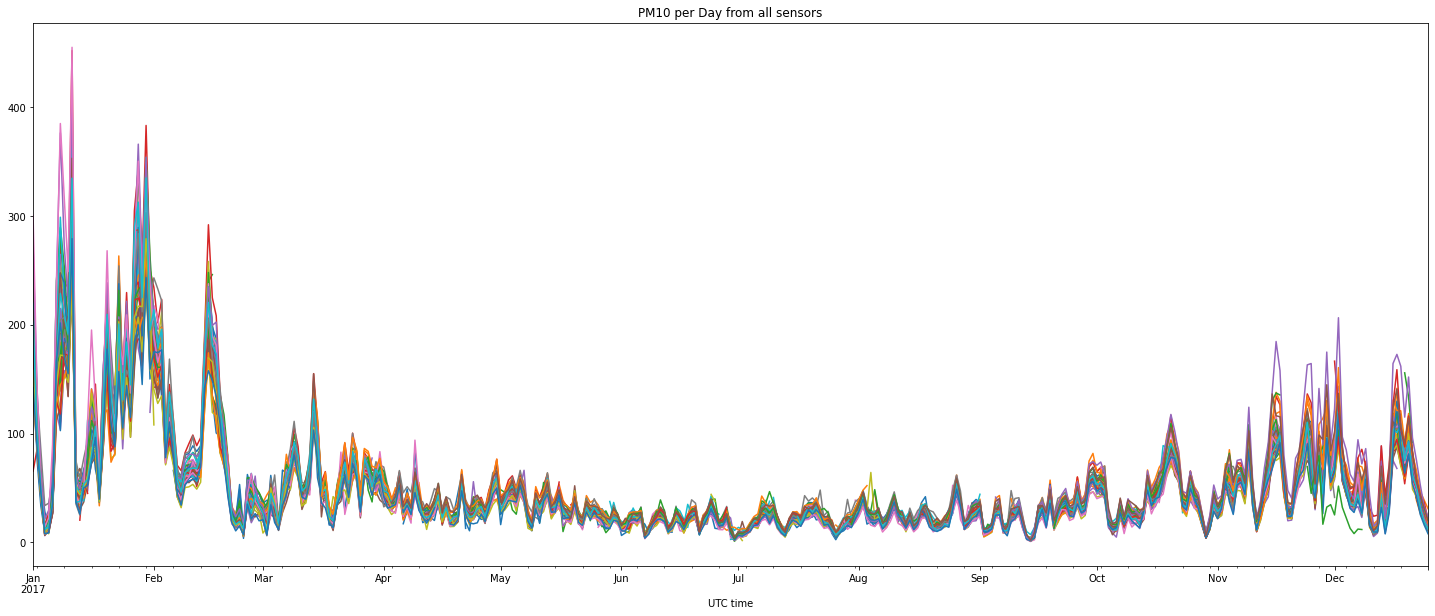

<Figure size 432x288 with 0 Axes>

In [28]:
days.plot(figsize=(25,10), legend=False, subplots=False)
plt.title("PM10 per Day from all sensors")
plt.show()
plt.savefig('PM10_per_Day_from_all_sensors.png')

In [29]:
week = year[columns_pm10].groupby(pd.Grouper(freq='W', origin='start')).mean()
week[:3]

3_pm10  140_pm10    142_pm10  ...  808_pm10  857_pm10  895_pm10
UTC time                                  ...                              
2017-01-01     NaN       NaN  193.000000  ...       NaN       NaN       NaN
2017-01-08     NaN       NaN  101.030075  ...       NaN       NaN       NaN
2017-01-15     NaN       NaN  138.017857  ...       NaN       NaN       NaN

[3 rows x 56 columns]

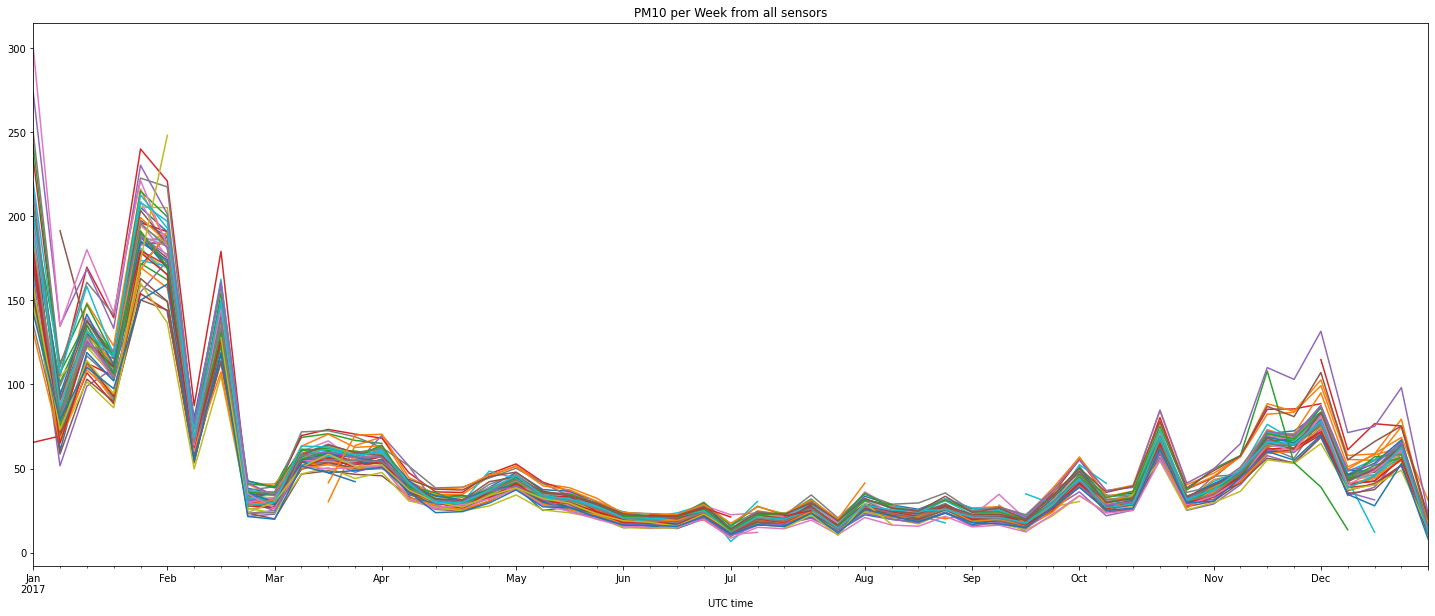

<Figure size 432x288 with 0 Axes>

In [30]:
week.plot(figsize=(25,10), legend=False, subplots=False)
plt.title("PM10 per Week from all sensors")
plt.show()
plt.savefig('PM10_per_Week_from_all_sensors.png')

In [31]:
months = year[columns_pm10].groupby(pd.Grouper(freq='1M', origin='start')).mean()
months[:3]

3_pm10   140_pm10    142_pm10  ...  808_pm10  857_pm10  895_pm10
UTC time                                       ...                              
2017-01-31  178.758209        NaN  144.864865  ...       NaN       NaN       NaN
2017-02-28  100.640835        NaN   91.428105  ...       NaN       NaN       NaN
2017-03-31   50.541485  61.554252   62.778090  ...       NaN       NaN       NaN

[3 rows x 56 columns]

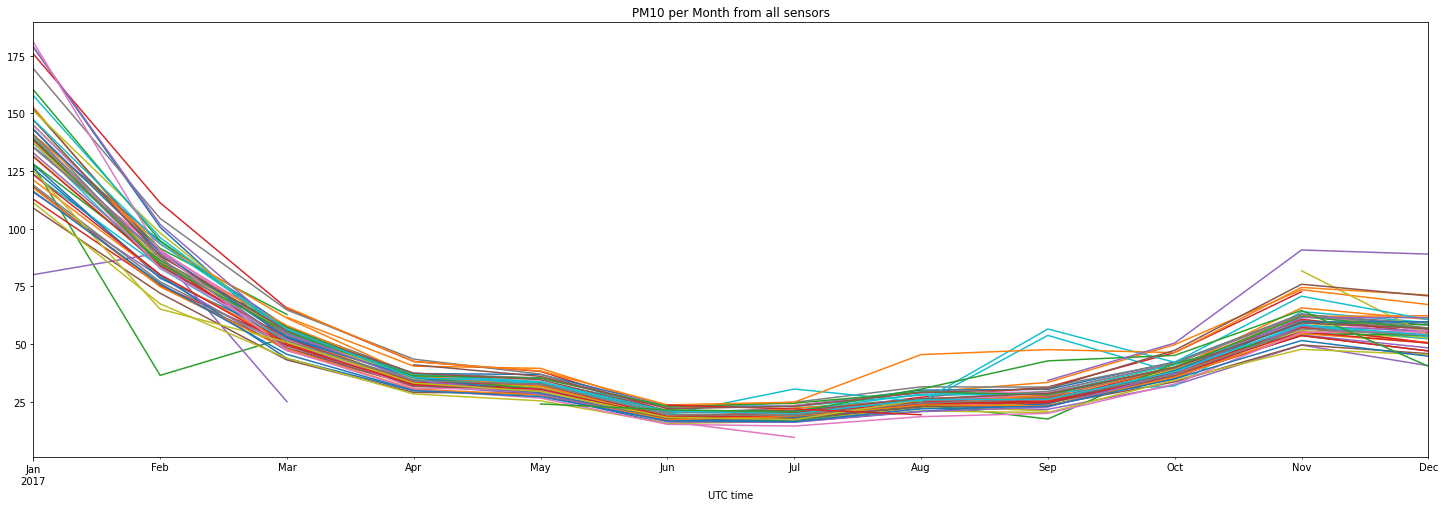

<Figure size 432x288 with 0 Axes>

In [32]:
months.plot(figsize=(25,8), legend=False, subplots=False)
plt.title("PM10 per Month from all sensors")
plt.show()
plt.savefig('PM10_per_Month_from_all_sensors.png')

In [33]:
quarter = year[columns_pm10].groupby(pd.Grouper(freq='Q', origin='start')).mean()
quarter[:3]

3_pm10   140_pm10   142_pm10  ...   808_pm10   857_pm10   895_pm10
UTC time                                      ...                                 
2017-03-31  112.540891  61.554252  99.061307  ...        NaN        NaN        NaN
2017-06-30         NaN  33.906015        NaN  ...  23.514706        NaN  33.072318
2017-09-30         NaN  28.459217        NaN  ...  21.448598  34.197092  27.466033

[3 rows x 56 columns]

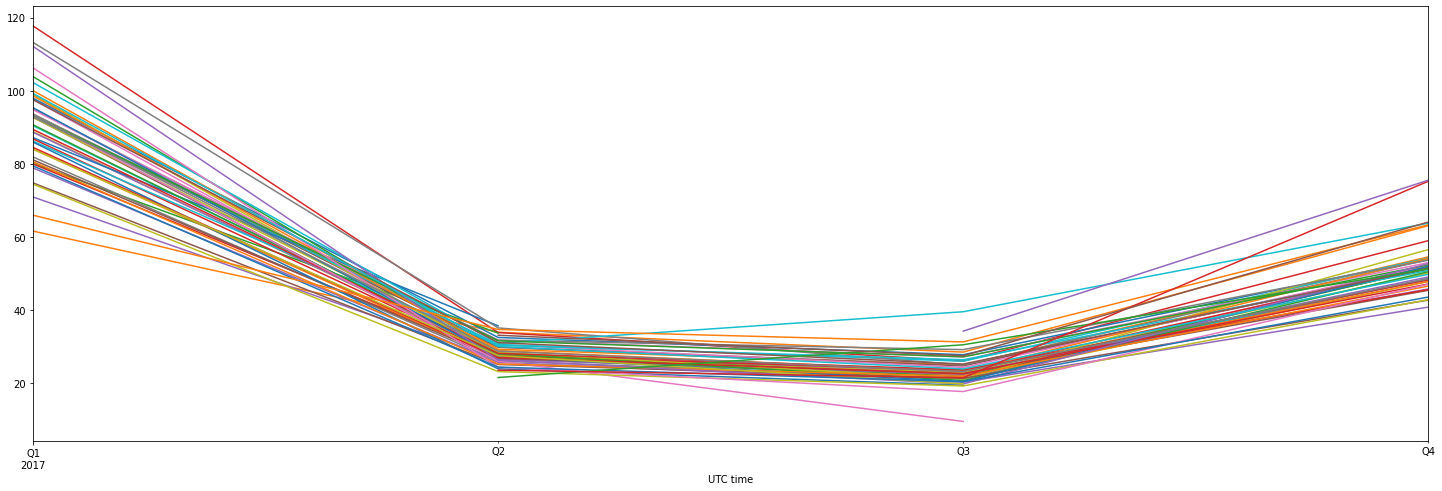

In [34]:
quarter.plot(figsize=(25,8), legend=False, subplots=False)
plt.show()

In [35]:
new_df = pd.DataFrame()

In [36]:
for i in year.groupby(year.columns.str.split('_').str[0], axis=1):
  old = i[1].columns
  new = i[1].columns.str.split("_").str[1]
  zmiana = { k:v  for k,v in zip(old,new)}
  i[1].rename(columns=zmiana,inplace=True)
  i[1]["id"] = i[0]
  new_df = new_df.append(i[1])
  # print(i[1])

In [37]:
new_df[:3]

temperature  humidity  pressure  pm1  pm25  pm10   id
UTC time                                                                  
2017-01-01 00:00:00          NaN       NaN       NaN  NaN   NaN   NaN  140
2017-01-01 01:00:00          NaN       NaN       NaN  NaN   NaN   NaN  140
2017-01-01 02:00:00          NaN       NaN       NaN  NaN   NaN   NaN  140

3.2 Połaczenie wartości z konkretnymi lokalizacjami wg ID sensoru

In [38]:
new_df["id"] = new_df["id"].astype(int)
sensors["id"] = sensors["id"].astype(int)

In [39]:
new_df = new_df.reset_index()

In [40]:
geo_df = new_df.merge(sensors, how='left', on='id')
geo_df[:3]

UTC time  temperature  humidity  ...   id   latitude  longitude
0 2017-01-01 00:00:00          NaN       NaN  ...  140  50.057747  19.961374
1 2017-01-01 01:00:00          NaN       NaN  ...  140  50.057747  19.961374
2 2017-01-01 02:00:00          NaN       NaN  ...  140  50.057747  19.961374

[3 rows x 10 columns]

4 EDA

In [41]:
geo_df.shape

(481208, 10)

4.1. Ile jest Nan w danych kolumnach

In [42]:
geo_df.isnull().sum()

UTC time            0
temperature    109558
humidity       109638
pressure       172529
pm1             92854
pm25            92835
pm10            92832
id                  0
latitude            0
longitude           0
dtype: int64

4.2. Czy można znaleźć brakujące dane lub czymś je zastąpić

In [43]:
geo_df = geo_df.dropna()
geo_df.shape

(291754, 10)

`po usunięciu indexów resetuje je aby ponownie miały ciągłość`

In [44]:
geo_df.reset_index(drop=True, inplace=True)
geo_df.index

RangeIndex(start=0, stop=291754, step=1)

4.3. Jakie zastosować normy i ich zakresy dla stężenia pm10 w celu określenia jakości powietrza

In [45]:
geo_df.pm10.describe([0.4,0.75, 0.9, 0.95,0.99])

count    291754.000000
mean         49.589233
std          53.379528
min          -1.000000
40%          26.000000
50%          34.000000
75%          61.000000
90%         102.000000
95%         154.000000
99%         282.000000
max         664.000000
Name: pm10, dtype: float64

Wnioski
> podejrzana wartość to `min = -1`. Poziom stężenia nie może być ujemny. Dane prawdopodobnie wymagają dalszego oczyszczenia. 

> niepokojąca jest też wartość `max=664` . Normy zaczynają sie od 25 a kończna na 150 .  Czy dla wartości powyżej 200 powinniśmy przyjąć własne normy ?

> Istotny jest fakt że 99% danych mieści się w zakresie od 0 do 282.  

Wnioski:
> Źródła zgodnie podają że stan powyżej 100 dla pm10 jest "alarmujący". Z uwagi że podaczas wysiku fizycznego na świerzym powietrzu pobiera się wiecej powietrza niż przy zwykłej aktywnośći uznaję że wszytkie pomiary powyżej 100 będą uznawane za szkodliwe dla zdrowia. 

> Zakresy dla PM10 które będę w dalszych krokach prowadziło to 0,25,50,100,150

5 Zmiana danych na kategoryczne - Rozbicie TimeSeries na dzień, miesiąc etc


In [46]:
import warnings
warnings.filterwarnings("ignore")

Zamieniamy UTC Time na dane kategoryczne \
`lato = okres nie grzewczy` \
`zima = okres grzewczy` \
`dzien = pora dnia nie grzewcza ( ludzi sa w pracy) od 10-16` \
`noc = pora dnia grzewcza ( ludzi wracają do domow (korki) i grzanie przed nocą ) od 17-9`

In [47]:
def parse_season(x):
    if x in [4,5,6,7,8,9]:
       return "lato"
    elif x in [1,2,3,10,11,12]:
       return "zima"
    else:
       return "bład"

In [48]:
def parse_hours(x):
    if x in [10,11,12,13,14,15,16]:
       return "dzien"
    elif x in [17,18,19,20,21,22,23,0,1,2,3,4,5,6,7,8,9,]:
       return "noc"
    else:
       return "bład"

In [49]:
geo_df["season"] = geo_df["UTC time"].dt.month.apply(parse_season)
geo_df["part_of_the_day"] = geo_df["UTC time"].dt.hour.apply(parse_hours)
geo_df[:3]

UTC time  temperature  humidity  ...  longitude  season  part_of_the_day
0 2017-03-17 11:00:00         12.0      44.0  ...  19.961374    zima            dzien
1 2017-03-17 12:00:00         12.0      45.0  ...  19.961374    zima            dzien
2 2017-03-17 13:00:00         12.0      43.0  ...  19.961374    zima            dzien

[3 rows x 12 columns]

In [50]:
geo_df.shape

(291754, 12)

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
ohe = OneHotEncoder(drop="first") 
geo_df_trans = ohe.fit_transform(geo_df[["season","part_of_the_day"]])

In [53]:
geo_df_trans = pd.DataFrame(geo_df_trans.toarray(),columns=ohe.get_feature_names())
geo_df_trans[:3]

x0_zima  x1_noc
0      1.0     0.0
1      1.0     0.0
2      1.0     0.0

In [54]:
#podgląd czy po transformacji wszystko sie zgadza
geo_df = pd.concat([geo_df,geo_df_trans],axis=1)
geo_df[:3]

UTC time  temperature  humidity  ...  part_of_the_day  x0_zima  x1_noc
0 2017-03-17 11:00:00         12.0      44.0  ...            dzien      1.0     0.0
1 2017-03-17 12:00:00         12.0      45.0  ...            dzien      1.0     0.0
2 2017-03-17 13:00:00         12.0      43.0  ...            dzien      1.0     0.0

[3 rows x 14 columns]

In [55]:
geo_df.shape

(291754, 14)

6 Normalizacja współrzędnych - Standard scaller lub wzór (-50x1000)

7 Predykcja - szukanie najlepszego modelu

`ustawienie X i y`

In [56]:
X = geo_df[["latitude","longitude","x0_zima","x1_noc"]]
X[:3]

latitude  longitude  x0_zima  x1_noc
0  50.057747  19.961374      1.0     0.0
1  50.057747  19.961374      1.0     0.0
2  50.057747  19.961374      1.0     0.0

In [57]:
y = geo_df["pm10"]
y[:3]

0    22.0
1    26.0
2    26.0
Name: pm10, dtype: float64

7.1 Regression

7.1.1 Regresja liniowa

In [58]:
from sklearn.linear_model import LinearRegression

7.1.1.2 Regresja liniowa Podstawowy model

In [59]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
#podgląd wszysktich danych testowych danych
podglad = geo_df.iloc[[3,1812,4000,5994]]
podglad

UTC time  temperature  ...  x0_zima  x1_noc
3    2017-03-17 14:00:00         12.0  ...      1.0     0.0
1812 2017-06-03 11:00:00         24.0  ...      0.0     0.0
4000 2017-09-13 03:00:00          9.0  ...      0.0     1.0
5994 2017-12-05 21:00:00          2.0  ...      1.0     1.0

[4 rows x 14 columns]

In [61]:
#przygotowanie dandych do modelu
df_predict = podglad[X.columns]
df_predict

latitude  longitude  x0_zima  x1_noc
3     50.057747  19.961374      1.0     0.0
1812  50.057747  19.961374      0.0     0.0
4000  50.057747  19.961374      0.0     1.0
5994  50.057747  19.961374      1.0     1.0

In [62]:
#predykcja
predict = model.predict(df_predict)
predict

array([58.08787322, 13.31758695, 30.4122915 , 75.18257777])

In [63]:
#porównanie 
podglad["pm10"].values[0]
podglad["predict_pm10"] = predict
podglad[X.columns.to_list() + ["pm10","predict_pm10"] ]

latitude  longitude  x0_zima  x1_noc  pm10  predict_pm10
3     50.057747  19.961374      1.0     0.0  32.0     58.087873
1812  50.057747  19.961374      0.0     0.0   6.0     13.317587
4000  50.057747  19.961374      0.0     1.0  11.0     30.412292
5994  50.057747  19.961374      1.0     1.0  60.0     75.182578

7.1.1.3 Regresja liniowa - Dostrajanie modelu np grid search

7.1.2.1 RandomForestRegressor()

In [64]:
from sklearn.ensemble import RandomForestRegressor

7.1.2.2 RandomForestRegressor() - Podstawowy model

In [65]:
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [66]:
#podgląd wszysktich danych testowych danych
podglad = geo_df.iloc[[3,1812,4000,5994]]
podglad

UTC time  temperature  ...  x0_zima  x1_noc
3    2017-03-17 14:00:00         12.0  ...      1.0     0.0
1812 2017-06-03 11:00:00         24.0  ...      0.0     0.0
4000 2017-09-13 03:00:00          9.0  ...      0.0     1.0
5994 2017-12-05 21:00:00          2.0  ...      1.0     1.0

[4 rows x 14 columns]

In [67]:
#przygotowanie dandych do modelu
df_predict = podglad[X.columns]
df_predict

latitude  longitude  x0_zima  x1_noc
3     50.057747  19.961374      1.0     0.0
1812  50.057747  19.961374      0.0     0.0
4000  50.057747  19.961374      0.0     1.0
5994  50.057747  19.961374      1.0     1.0

In [68]:
#predykcja
predict = model.predict(df_predict)
predict

array([49.55784132, 21.16275467, 35.77410495, 71.80446759])

In [69]:
#porównanie 
podglad["pm10"].values[0]
podglad["predict_pm10"] = predict
podglad[X.columns.to_list() + ["pm10","predict_pm10"] ]

latitude  longitude  x0_zima  x1_noc  pm10  predict_pm10
3     50.057747  19.961374      1.0     0.0  32.0     49.557841
1812  50.057747  19.961374      0.0     0.0   6.0     21.162755
4000  50.057747  19.961374      0.0     1.0  11.0     35.774105
5994  50.057747  19.961374      1.0     1.0  60.0     71.804468

7.1.2.3 RandomForestRegressor() - Dostrajanie modelu np grid search

In [70]:
# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [71]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [2,5,10,50,100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    }

In [72]:
from sklearn.model_selection import GridSearchCV

model=RandomForestRegressor()
grid_search  = GridSearchCV(model, param_grid, cv=3, n_jobs = -1, verbose = 10)
grid_search .fit(X, y)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  8

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [73]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_split': 10}

In [74]:
model = RandomForestRegressor(**grid_search.best_params_)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [75]:
#przygotowanie dandych do modelu
df_predict = podglad[X.columns]
df_predict

latitude  longitude  x0_zima  x1_noc
3     50.057747  19.961374      1.0     0.0
1812  50.057747  19.961374      0.0     0.0
4000  50.057747  19.961374      0.0     1.0
5994  50.057747  19.961374      1.0     1.0

In [76]:
#predykcja
predict = model.predict(df_predict)
predict

array([54.23670618, 18.76435385, 28.94090174, 77.54610585])

In [77]:
#porównanie 
podglad["pm10"].values[0]
podglad["predict_pm10"] = predict
podglad[X.columns.to_list() + ["pm10","predict_pm10"] ]

latitude  longitude  x0_zima  x1_noc  pm10  predict_pm10
3     50.057747  19.961374      1.0     0.0  32.0     54.236706
1812  50.057747  19.961374      0.0     0.0   6.0     18.764354
4000  50.057747  19.961374      0.0     1.0  11.0     28.940902
5994  50.057747  19.961374      1.0     1.0  60.0     77.546106

7.2 Predykcja TimeSeries

7.2.1 arima (pmd arima auto-arima)

7.2.2 Profet

7.3 RNN

7.3.1 LSTM

7.3.1.1 LSTM - Podstawowy

7.3.1.2 LSTM - Dwukierunkowy

7.3.2 GRU

7.3.2.1 GRU - Podstawowy

7.3.2.2 GRU - Dwukierunkowy

8 Zestawienie wyników predykcji - wybranie najlepszego modelu do predykcji 

9 Obliczenie predykcji dla nowej daty dla wszystkich punktów pomiarowych 

10 Prototyp

10.1 Utworzenie siatki punktów w na terenie całego krakowa zlokalizowanych co 500m

In [78]:
left_top_corner =  [50.107 ,19.82]

points = pd.DataFrame()

for i in range(45):
  id_i = str(i+1) 
  i = i * 0.00463  # im mniejsza wartość tym bliższe odległości od kolejnego punktu
  for x in range(35):
    id = id_i + "-" + str(x+1)
    x = x * 0.00297      # im mniejsza wartość tym bliższe odległości od kolejnego punktu
    lat = left_top_corner[0] - x
    lon = left_top_corner[1] + i
    points = points.append({"id":id,"Latitude":lat,"Longitude":lon},ignore_index=True)

points

Latitude  Longitude     id
0     50.10700   19.82000    1-1
1     50.10403   19.82000    1-2
2     50.10106   19.82000    1-3
3     50.09809   19.82000    1-4
4     50.09512   19.82000    1-5
...        ...        ...    ...
1570  50.01790   20.02372  45-31
1571  50.01493   20.02372  45-32
1572  50.01196   20.02372  45-33
1573  50.00899   20.02372  45-34
1574  50.00602   20.02372  45-35

[1575 rows x 3 columns]

10.2 Obliczenie predykcji dla wszystkich stacji pomiarowych dla konkretnej daty

In [79]:
#podgląd danych do testowej predykcji
geo_df.iloc[1812].to_frame().T

UTC time temperature humidity  ... part_of_the_day x0_zima x1_noc
1812 2017-06-03 11:00:00          24       37  ...           dzien       0      0

[1 rows x 14 columns]

`wprowadzenie danych przez użytkownika`

In [92]:
data = "2017-12-03"
time = "11"
user_time = pd.Timestamp(data + " " + time + ":00:00")
user_latitude = "50.057747"
user_longitude = "19.961374"

In [93]:
user_date = pd.DataFrame([user_time, user_latitude, user_longitude]).T
user_date.columns = ["UTC time","latitude","longitude"]
user_date

UTC time   latitude  longitude
0 2017-12-03 11:00:00  50.057747  19.961374

`utc time zamieniam używajać wcześniej zaimplementowanych funkcji  na season i part of the day`

In [94]:
user_date["season"] = user_date["UTC time"].dt.month.apply(parse_season)
user_date["part_of_the_day"] = user_date["UTC time"].dt.hour.apply(parse_hours)
user_date[:3]

UTC time   latitude  longitude season part_of_the_day
0 2017-12-03 11:00:00  50.057747  19.961374   zima           dzien

`one hot encoder`

In [95]:
user_date_trans = ohe.transform(user_date[["season","part_of_the_day"]])

In [96]:
user_date_trans = pd.DataFrame(user_date_trans.toarray(),columns=ohe.get_feature_names())
user_date_trans[:3]

x0_zima  x1_noc
0      1.0     0.0

`do dodatkowych punktów dodaje dane po transformacji`

In [97]:
points_prediction = points[["Latitude","Longitude"]]
points_prediction["x0_zima"] = user_date_trans["x0_zima"].values[0]
points_prediction["x1_noc"] = user_date_trans["x1_noc"].values[0]
points_prediction[:3]

Latitude  Longitude  x0_zima  x1_noc
0  50.10700      19.82      1.0     0.0
1  50.10403      19.82      1.0     0.0
2  50.10106      19.82      1.0     0.0

In [98]:
#przewidziało
prediction = model.predict(points_prediction)
prediction

array([54.23670618, 54.23670618, 54.23670618, ..., 54.23670618,
       54.23670618, 54.23670618])

In [99]:
points_prediction["prediction_pm10"] = prediction
points_prediction[:3]

Latitude  Longitude  x0_zima  x1_noc  prediction_pm10
0  50.10700      19.82      1.0     0.0        54.236706
1  50.10403      19.82      1.0     0.0        54.236706
2  50.10106      19.82      1.0     0.0        54.236706

In [100]:
points_prediction["prediction_pm10"].describe().to_frame().T

count       mean  ...        75%        max
prediction_pm10  1575.0  54.236706  ...  54.236706  54.236706

[1 rows x 8 columns]

In [101]:
!pip -q install folium
import folium

In [102]:
location = [50.0614 ,19.9366]

m = folium.Map(location=location, zoom_start=17)


for ind in points_prediction.index: 
    tooltip_txt = 'PM10:' + str(points_prediction['prediction_pm10'][ind])
    
    if points_prediction['prediction_pm10'][ind] <= 25:
      color="green",
    elif (points_prediction['prediction_pm10'][ind] > 25) & (points_prediction['prediction_pm10'][ind] <= 50):
      color="orange",
    elif (points_prediction['prediction_pm10'][ind] > 50) & (points_prediction['prediction_pm10'][ind] <= 100):
      color="red",
    elif (points_prediction['prediction_pm10'][ind] > 100):
      color="black",
    else:
      color="white"

    folium.Circle(
          location=[float(points_prediction['Latitude'][ind]), float(points_prediction['Longitude'][ind])], 
          radius=165,
          # popup="Laurelhurst Park",
          # fill=True,
          # fill_color="#3186cc",
          fill_color=color,
          color=color,
          tooltip= tooltip_txt
      ).add_to(m)
m

> zastanawiam się czy model nie został przeuczony dla  wartości z małym stężeniem. Sprawdziłem proporacje w zbiorze i 40% wartości dla pm10 sa z zakresu 0-26.   Może trzeba pomyśleć o upsample/downsample . Nie pamiętam czy przy predykcji można ją stosować.    Co myślicie ?  Skoro ustalimy wcześniej zakrsy to może przerzucić się na klasyfikacje a nie regresję ?

> aby upewnić się trzeba zastosować predykcję dla dnia w którym na pewno było wysokie stęrzenie pm10

In [103]:
name_file = "index.html"

m.save(name_file)
from google.colab import files
files.download(name_file) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

10.3 Utworzenie modelu K-najbliższych sąsiadów -regression (odległość, haversine distance- odległość km )